In [1]:
##### C:\Users\David\Dropbox\IDIBAPS\my code\Project 1 (master thesis)\Modeling radial dimension\matrixes radial model simulations\model_2_0\model_radial_dimension_2.m

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, exp, sqrt, pi
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import scipy
from scipy import special
import seaborn as sns

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

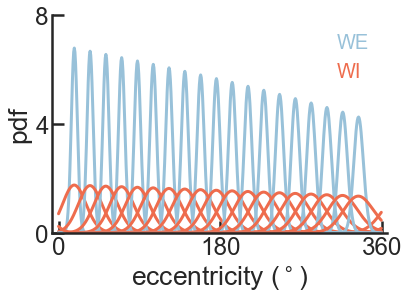

In [26]:
N=512

v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 
###
kappas_e_range= np.linspace(100, 300, N) ##100-300 ok
kappas_e_range = np.flip(kappas_e_range)
###
kappas_i_range = np.linspace(11, 20, N) #15-20 ok
kappas_i_range = np.flip(kappas_i_range)
###
for i in range(0, N):
    v_E_new=[e**(kappas_e_range[i]*cos(theta[f]))/(2*pi*scipy.special.i0(kappas_e_range[i])) for f in range(0, len(theta))]    
    v_I_new=[e**(kappas_i_range[i]*cos(theta[f]))/(2*pi*scipy.special.i0(kappas_i_range[i])) for f in range(0, len(theta))]
    ###    
    vE_NEW=roll(v_E_new,i)
    vI_NEW=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW

    
####
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.ylim(0,8)
plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)

In [35]:
SE = 1/kappas_e_range * 10 

In [58]:
N=512 #number neurons
n_inc = 1 #radius in
n_ecx = 11 #radius out
n_inicial = np.linspace(n_inc, n_ecx, N)

In [5]:

alfa_E= 0.00075
alfa_I= 0.0015
alfa_E= 0.00080; 
alfa_I= 0.00009; 

sigmas_E= alfa_E* n_inicial**1.80 +0.035; 
sigmas_I=alfa_I* n_inicial**2.375 + 0.040; 



In [42]:
print(sigmas_E[0], sigmas_E[-1])
print(sigmas_I[0], sigmas_I[-1])

0.035800000000000005 0.09492345152219628
0.04009 0.06676394549045069


In [ ]:
[ 1/(sqrt(2*pi)*kappas_e_range[i])*e**(-((11-d)**2)/(2*kappas_e_range[i])**2)  for d in n_inicial] 

In [46]:
print(kappas_i_range[0], kappas_i_range[-1])
print(SI[0], SI[-1])

20.0 11.0
0.05 0.09090909090909091


In [62]:
N=512 #number neurons
n_inc = 2 #radius in
n_ecx = 6 #radius out
n_inicial = np.linspace(n_inc, n_ecx, N)

In [68]:
SE = 1/kappas_e_range *10
SI = 1/kappas_i_range 

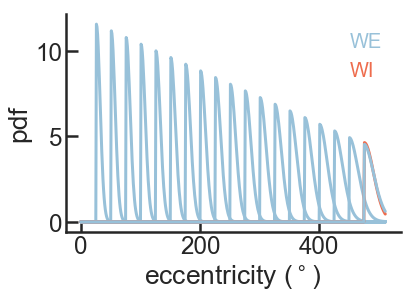

In [69]:
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

for i in range(0, 512):
    #        
    v_E_new=[ 1/(sqrt(2*pi)*SE[i])*e**(-((n_ecx-d)**2)/(2*SE[i])**2)  for d in n_inicial]    ##sigmas_E
    v_I_new=[ 1/(sqrt(2*pi)*SI[i])*e**(-((n_ecx-d)**2)/(2*SI[i])**2)  for d in n_inicial]   ##sigmas_I
    ###    
    v_E_new=roll(v_E_new,i)
    v_I_new=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=v_E_new
    WI[:,i]=v_I_new

###
####
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    #plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.plot(WE[475, :], p_cols[0], label='WE')
#plt.ylim(0,8)
#plt.yticks([0,4,8])
#plt.xlim(-10, 520)
#plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)    

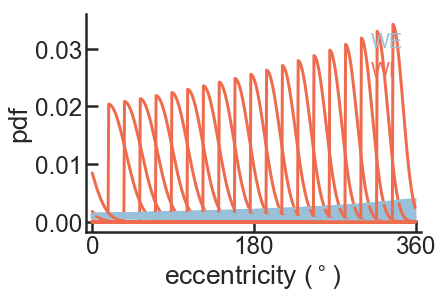

In [45]:
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

for i in range(0, N):
    #        
    v_E_new=[ 1/(sqrt(2*pi)*kappas_e_range[i])*e**(-((512-d)**2)/(2*kappas_e_range[i])**2)  for d in range(0,N)]    
    v_I_new=[ 1/(sqrt(2*pi)*kappas_i_range[i])*e**(-((512-d)**2)/(2*kappas_i_range[i])**2)  for d in range(0,N)]   
    ###    
    vE_NEW=roll(v_E_new,i)
    vI_NEW=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW
    

####
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.plot(WI[475, :], p_cols[1], label='WI')
#plt.ylim(0,8)
#plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)    

IndentationError: expected an indented block (<ipython-input-26-ec1f6520e74d>, line 22)

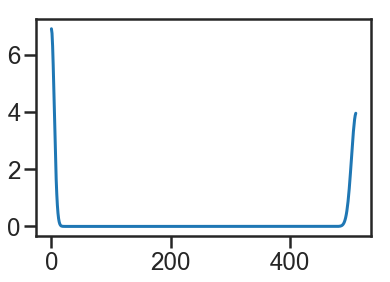

In [20]:
plt.plot(WE[0])

In [ ]:
alfa_E= 0.00080; %0.00055 %0.002 %0.0025;  %0.008
alfa_I= 0.00009; %0.02; %alfa_I ha de ser mayor a alfa E, ya que la inhibición ha de ser una gausiana mas ancha

sigmas_E= alfa_E* n_inicial.^1.80 +0.035; % antes +0,05 (graphs of the folder )% 1.9 es la menor sigma y 0.15 cercana a la mayor...
sigmas_I=alfa_I* n_inicial.^2.375 + 0.040; % 0.9 %^1.2


v_E=zeros(1,N);
v_I=zeros(1,N);
WE=zeros(N,N);
WI=zeros(N,N);

for j=1:N %para cada distancia hay una sigma diferente
    for i=1:N %dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E(i)=1/(sqrt(2*pi)*sigmas_E(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_E(j))^2);
        v_I(i)=1/(sqrt(2*pi)*sigmas_I(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_I(j))^2);
    end
  WE(:,j)=v_E;
  WI(:,j)=v_I;
end